In [1]:
import pandas as pd
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

import scipy as sp
import scipy.stats as sps

In [2]:
data_points = pd.read_csv('Emergency-Admissions.csv')

In [3]:
data_points.head()

,code,2011 super output area - lower layer,Hansen Score,LLTI,TOTAL POP,Over 65,Under 18's,BETWEEN 18-64,LLTI RATE,expected under 18s,...,Age 90 and over,Males,Females,Area (Hectares),Density (number of persons per hectare),One person household,One person household: Aged 65 and over,One person household: Other,Does not have central heating,Occupancy rating (bedrooms) of -1 or less
0,E01033016,E01033016 : Leeds 111E,392.48,17.0,1017.0,13.0,25.0,979.0,0.02,0.40,...,0.0,590.0,427.0,76.11,13.4,441.0,5.0,436.0,46.0,24.0
1,E01033034,E01033034 : Leeds 075G,637.72,15.0,1025.0,11.0,22.0,992.0,0.01,0.35,...,2.0,590.0,435.0,13.15,77.9,316.0,10.0,306.0,47.0,26.0
2,E01033018,E01033018 : Leeds 112D,469.71,8.0,1137.0,3.0,32.0,1102.0,0.01,0.51,...,1.0,664.0,473.0,41.02,27.7,363.0,1.0,362.0,71.0,53.0
3,E01033015,E01033015 : Leeds 111D,1335.61,8.0,1167.0,7.0,35.0,1125.0,0.01,0.56,...,0.0,685.0,482.0,36.95,31.6,299.0,4.0,295.0,62.0,27.0
4,E01033008,E01033008 : Leeds 111A,62.22,21.0,1120.0,7.0,40.0,1073.0,0.02,0.64,...,0.0,631.0,489.0,38.61,29.0,364.0,4.0,360.0,91.0,24.0


In [4]:
print(f"Data frame is {data_points.shape[0]:,} x {data_points.shape[1]}")

Data frame is 482 x 53


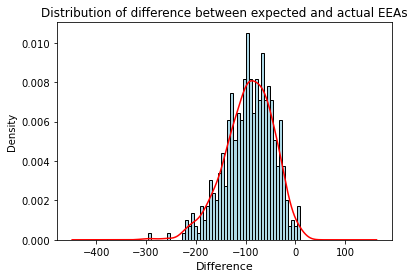

In [5]:
#Distribution of Hansen Accessibility

data_points['diff between expected and actuals'].plot(kind = 'hist', bins = 50, color = 'lightblue', edgecolor = 'black', density = True, alpha=1)
data_points['diff between expected and actuals'].plot(kind = 'kde', color = 'red')
plt.title('Distribution of difference between expected and actual EEAs',fontsize=12)
plt.xlabel("Difference",fontsize=11)
plt.savefig('Difference LSOA histogram')

In [6]:
data_points[['diff between expected and actuals']].describe()

,diff between expected and actuals
count,482.000000
mean,-93.084730
std,48.010242
min,-295.450000
25%,-124.170000
50%,-89.755000
75%,-58.400000
max,10.390000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc16b77b750>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc16b77bfd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fc16b661c90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc16b76d890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc16b76dd10>],
 'means': []}

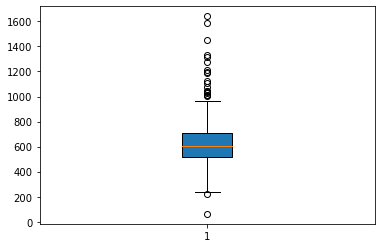

In [7]:
plt.boxplot(data_points['Hansen Score'], vert=True, patch_artist=True)

In [8]:
data_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 53 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   code                                                                  482 non-null    object 
 1   2011 super output area - lower layer                                  482 non-null    object 
 2   Hansen Score                                                          482 non-null    float64
 3   LLTI                                                                  482 non-null    float64
 4   TOTAL POP                                                             482 non-null    float64
 5   Over 65                                                               482 non-null    float64
 6   Under 18's                                                            482 non-null    float64
 7  

In [9]:
lsoas = gpd.read_file('england_lsoa_2011.shp')
print('Done.')

Done.


In [10]:
 print(lsoas.crs)

epsg:27700


<AxesSubplot:>

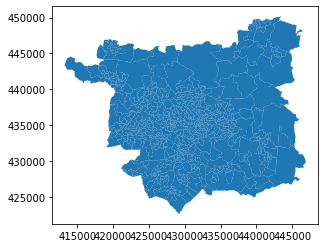

In [11]:
lsoas.plot()

In [12]:
lsoas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   label     482 non-null    object  
 1   name      482 non-null    object  
 2   code      482 non-null    object  
 3   geometry  482 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 15.2+ KB


In [13]:
lsoas_new = pd.merge(data_points, lsoas, on='code')

In [14]:
lsoas_new.head()

,code,2011 super output area - lower layer,Hansen Score,LLTI,TOTAL POP,Over 65,Under 18's,BETWEEN 18-64,LLTI RATE,expected under 18s,...,Area (Hectares),Density (number of persons per hectare),One person household,One person household: Aged 65 and over,One person household: Other,Does not have central heating,Occupancy rating (bedrooms) of -1 or less,label,name,geometry
0,E01033016,E01033016 : Leeds 111E,392.48,17.0,1017.0,13.0,25.0,979.0,0.02,0.40,...,76.11,13.4,441.0,5.0,436.0,46.0,24.0,E08000035E02006875E01033016,Leeds 111E,"POLYGON ((429738.004 433537.387, 429742.300 43..."
1,E01033034,E01033034 : Leeds 075G,637.72,15.0,1025.0,11.0,22.0,992.0,0.01,0.35,...,13.15,77.9,316.0,10.0,306.0,47.0,26.0,E08000035E02002404E01033034,Leeds 075G,"POLYGON ((430808.000 433241.000, 430814.000 43..."
2,E01033018,E01033018 : Leeds 112D,469.71,8.0,1137.0,3.0,32.0,1102.0,0.01,0.51,...,41.02,27.7,363.0,1.0,362.0,71.0,53.0,E08000035E02006876E01033018,Leeds 112D,"POLYGON ((430489.681 433078.080, 430552.438 43..."
3,E01033015,E01033015 : Leeds 111D,1335.61,8.0,1167.0,7.0,35.0,1125.0,0.01,0.56,...,36.95,31.6,299.0,4.0,295.0,62.0,27.0,E08000035E02006875E01033015,Leeds 111D,"POLYGON ((429037.244 433533.271, 429037.500 43..."
4,E01033008,E01033008 : Leeds 111A,62.22,21.0,1120.0,7.0,40.0,1073.0,0.02,0.64,...,38.61,29.0,364.0,4.0,360.0,91.0,24.0,E08000035E02006875E01033008,Leeds 111A,"POLYGON ((429927.000 434278.000, 429924.000 43..."


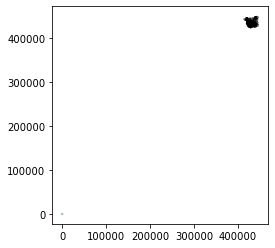

In [15]:
ax = lsoas.plot(edgecolor='black', facecolor='None', alpha=0.5)
lsoas_new.LLTI.plot(ax=ax, alpha=0.5);

In [16]:
print(list(data_points.columns.values))

['code', '2011 super output area - lower layer', 'Hansen Score', 'LLTI', 'TOTAL POP', 'Over 65', "Under 18's", 'BETWEEN 18-64', 'LLTI RATE', 'expected under 18s', 'expected between 18-64', 'expected over 65s', 'EXPECTED ADMISSIONS', 'diff between expected and actuals', 'TRUNC EXPECTED', 'Expected Rank', 'IMD Health', 'Truc Actual Admissions', 'White', 'Mixed/multiple ethnic groups', 'Asian/Asian British', 'Black/African/Caribbean/Black British', 'Other ethnic group', 'All categories: Highest level of qualification', 'No qualifications', 'Highest level of qualification: Level 4 qualifications and above', 'Full-time students: Age 18 to 74: Economically active: In employment', 'Full-time students: Age 18 to 74: Economically active: Unemployed', 'Age 0 to 4', 'Age 5 to 7', 'Age 8 to 9', 'Age 10 to 14', 'Age 15', 'Age 16 to 17', 'Age 18 to 19', 'Age 20 to 24', 'Age 25 to 29', 'Age 30 to 44', 'Age 45 to 59', 'Age 60 to 64', 'Age 65 to 74', 'Age 75 to 84', 'Age 85 to 89', 'Age 90 and over', '

In [17]:
data_points_refine = data_points.drop(['code', '2011 super output area - lower layer', 'LLTI', 'TOTAL POP', 'Over 65', "Under 18's", 'BETWEEN 18-64', 'LLTI RATE', 'expected under 18s', 'expected between 18-64', 'expected over 65s', 'EXPECTED ADMISSIONS', 'Expected Rank', 'TRUNC EXPECTED', 'Truc Actual Admissions', 'Area (Hectares)', 'Density (number of persons per hectare)'], axis= 1)

In [18]:
data_points_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 36 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Hansen Score                                                          482 non-null    float64
 1   diff between expected and actuals                                     482 non-null    float64
 2   IMD Health                                                            482 non-null    float64
 3   White                                                                 482 non-null    float64
 4   Mixed/multiple ethnic groups                                          482 non-null    float64
 5   Asian/Asian British                                                   482 non-null    float64
 6   Black/African/Caribbean/Black British                                 482 non-null    float64
 7  

In [19]:
x = data_points['diff between expected and actuals']

Understanding if variations come from age, sex, class, ethnicity

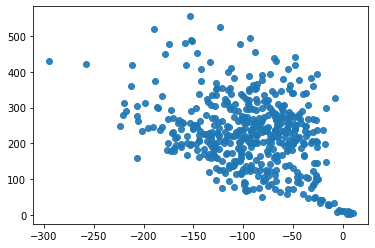

<Figure size 432x288 with 0 Axes>

In [20]:
fix, ax = plt.subplots()
ax.scatter(data_points[['diff between expected and actuals']], data_points[['Over 65']], alpha=0.9,)
plt.show()

plt.savefig('over 65 and diff in expected and actual')

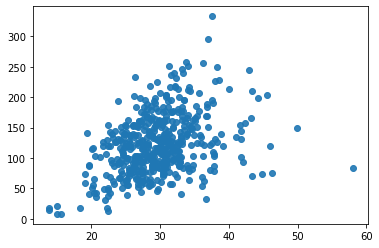

<Figure size 432x288 with 0 Axes>

In [21]:
fix, ax = plt.subplots()
ax.scatter(data_points[['EXPECTED ADMISSIONS']], data_points[['LLTI']], alpha=0.9,)
plt.show()

plt.savefig('Expected v Actual')

In [22]:
# COrrelation between expected and actuals 

exp_act = np.corrcoef(data_points[['EXPECTED ADMISSIONS']], data_points[['LLTI']])
print('Pearson Correlation Coefficient is:' , round(exp_act[0][1],8))

Pearson Correlation Coefficient is: nan


/opt/conda/envs/sds2020/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


#### 7. **REGRESSION PREPARATION** 

##### 7.1 **Reference Variables and collinearity**

In [23]:
df = data_points_refine
df.isnull().sum(axis=0).sort_values(ascending=False)[:5]

Occupancy rating (bedrooms) of -1 or less    0
Does not have central heating                0
Age 8 to 9                                   0
Age 5 to 7                                   0
Age 0 to 4                                   0
dtype: int64

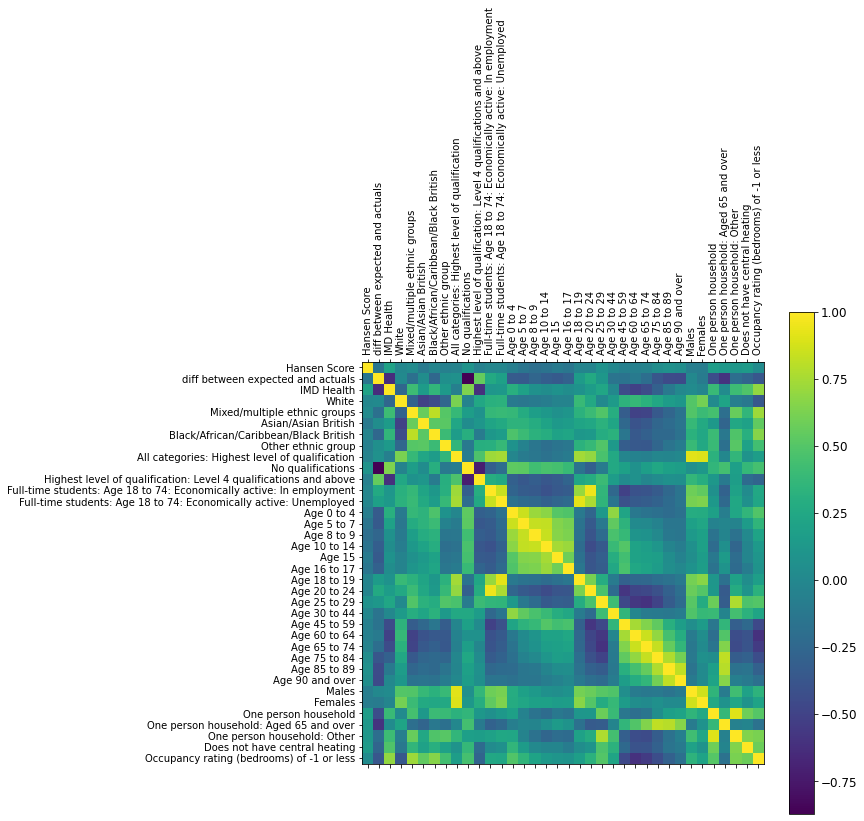

In [24]:
#CORRELATION MATRIX

df = data_points_refine
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(9, 9))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
#plt.title('Correlation Matrix', fontsize=14)

plt.savefig('correlation matrix')

##### 7.2 **Checking for multi-collinearity with VIF**

In [25]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [26]:
dataset_new = drop_column_using_vif_(data_points_refine.drop('diff between expected and actuals', axis=1))

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: White
Dropping: All categories: Highest level of qualification


/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: Age 0 to 4
Dropping: One person household


/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: Age 20 to 24
Dropping: Full-time students: Age 18 to 74: Economically active: In employment
Dropping: No qualifications
Dropping: Full-time students: Age 18 to 74: Economically active: Unemployed
Dropping: Age 75 to 84
Dropping: Females
Dropping: Age 25 to 29
Dropping: Occupancy rating (bedrooms) of -1 or less
Dropping: Age 10 to 14
Dropping: Age 65 to 74
Dropping: Age 85 to 89
Dropping: One person household: Other
Dropping: Mixed/multiple ethnic groups


In [27]:
dataset_new.columns

# using VIF on the child_obesity dataset

df_predictors_selected_VIF = drop_column_using_vif_(data_points_refine.drop('diff between expected and actuals', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: White


/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: All categories: Highest level of qualification


/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: Age 0 to 4


/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: One person household
Dropping: Age 20 to 24
Dropping: Full-time students: Age 18 to 74: Economically active: In employment
Dropping: No qualifications
Dropping: Full-time students: Age 18 to 74: Economically active: Unemployed
Dropping: Age 75 to 84
Dropping: Females
Dropping: Age 25 to 29
Dropping: Occupancy rating (bedrooms) of -1 or less
Dropping: Age 10 to 14
Dropping: Age 65 to 74
Dropping: Age 85 to 89
Dropping: One person household: Other
Dropping: Mixed/multiple ethnic groups
The columns remaining after VIF selection are:
Index(['Hansen Score', 'IMD Health', 'Asian/Asian British',
       'Black/African/Caribbean/Black British', 'Other ethnic group',
       'Highest level of qualification: Level 4 qualifications and above',
       'Age 5 to 7', 'Age 8 to 9', 'Age 15', 'Age 16 to 17', 'Age 18 to 19',
       'Age 30 to 44', 'Age 45 to 59', 'Age 60 to 64', 'Age 90 and over',
       'Males', 'One person household: Aged 65 and over',
       'Does not have central heating'],

##### 8. **MULTIPLE LINEAR REGRESSION**

##### 8.1 **Model Results**

In [28]:
model_admissions = sm.OLS(endog=data_points_refine[['diff between expected and actuals']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_admissions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     diff between expected and actuals   R-squared:                       0.858
Model:                                           OLS   Adj. R-squared:                  0.853
Method:                                Least Squares   F-statistic:                     155.6
Date:                               Tue, 19 Jan 2021   Prob (F-statistic):          3.16e-183
Time:                                       15:29:27   Log-Likelihood:                -2078.8
No. Observations:                                482   AIC:                             4196.
Df Residuals:                                    463   BIC:                             4275.
Df Model:                                         18                                         
Covariance Type:                           nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               20.4972      7.044      2.910      0.004       6.654      34.340
Hansen Score                                                         0.0026      0.005      0.536      0.592      -0.007       0.012
IMD Health                                                         -38.4396      2.478    -15.515      0.000     -43.308     -33.571
Asian/Asian British                                                  0.0116      0.007      1.715      0.087      -0.002       0.025
Black/African/Caribbean/Black British                               -0.0444      0.011     -3.888      0.000      -0.067      -0.022
Other ethnic group                                                  -0.0955      0.040     -2.393      0.017      -0.174      -0.017
Highest level of qualification: Level 4 qualifications and above     0.0545      0.009      6.069      0.000       0.037       0.072
Age 5 to 7                                                          -0.0525      0.087     -0.606      0.545      -0.223       0.118
Age 8 to 9                                                          -0.0289      0.131     -0.220      0.826      -0.287       0.229
Age 15                                                              -0.2429      0.165     -1.476      0.140      -0.566       0.080
Age 16 to 17                                                        -0.0278      0.088     -0.316      0.752      -0.201       0.145
Age 18 to 19                                                         0.0196      0.011      1.801      0.072      -0.002       0.041
Age 30 to 44                                                        -0.0463      0.018     -2.585      0.010      -0.082      -0.011
Age 45 to 59                                                        -0.0754      0.024     -3.172      0.002      -0.122      -0.029
Age 60 to 64                                                        -0.1448      0.053     -2.752      0.006      -0.248      -0.041
Age 90 and over                                                     -1.2000      0.132     -9.065      0.000      -1.460      -0.940
Males                                                               -0.0213      0.011     -2.023      0.044      -0.042      -0.001
One person household: Aged 65 and over                              -0.4199      0.037    -11.462      0.000      -0.492      -0.348
Does not have central heating                                        0.0667      0.044      1.529      0.127      -0.019     

In [29]:
print('OLS Results:')
gradient  = model_admissions.params[3]
intercept = model_admissions.params[0]
Rsquared = model_admissions.rsquared
MSE       = model_admissions.mse_resid
pvalue = model_admissions.f_pvalue
print("gradient  ", gradient)
print("intercept ", intercept)
print("Rsquared  ", Rsquared)
print("MSE       ", MSE)
print("pvalue    ", pvalue)

OLS Results:
gradient   0.011632092989268483
intercept  20.497200498992346
Rsquared   0.8581454937553977
MSE        339.6839361113661
pvalue     3.1641762486286734e-183


##### 8.2 **Residual Analysis**

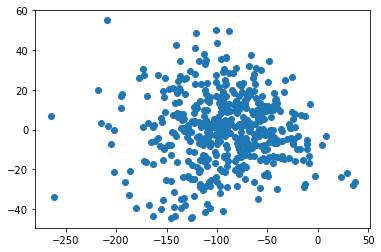

<Figure size 432x288 with 0 Axes>

In [30]:
# plotting the fixed v residuals for the complete model
plt.scatter(model_admissions.fittedvalues, model_admissions.resid)
#plt.xlabel('Fitted childhood obesity')
#plt.ylabel('Residual')
#plt.title('Residual vs. Fitted Plot of child obesity')
plt.show()

plt.savefig('OLS rediduals v fitted values')

	- issues with the efficiency of health care delivery 
	- issues about equity between different geographical areas
